In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../')
import utils
import calibration_utils as calibration
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [2]:
CALIBRATION_FILE = '../calibration/out/C.mat'
MEASUREMENT_ROOT = './measurement_files/'
MEASUREMENT = "validation_1"
NANO_FILE = MEASUREMENT_ROOT + MEASUREMENT + ".csv"
TELEMETRY_FILE = MEASUREMENT_ROOT + MEASUREMENT + "_telemetry.txt"

In [3]:
nano_df = calibration.nanofile_to_dataframe(NANO_FILE)
telem_df = calibration.telemetry_to_dataframe(TELEMETRY_FILE)
C = scipy.io.loadmat(CALIBRATION_FILE)['C']
print nano_df.shape
print telem_df.shape
print C.shape

(309000, 7)
(20395, 9)
(24, 6)


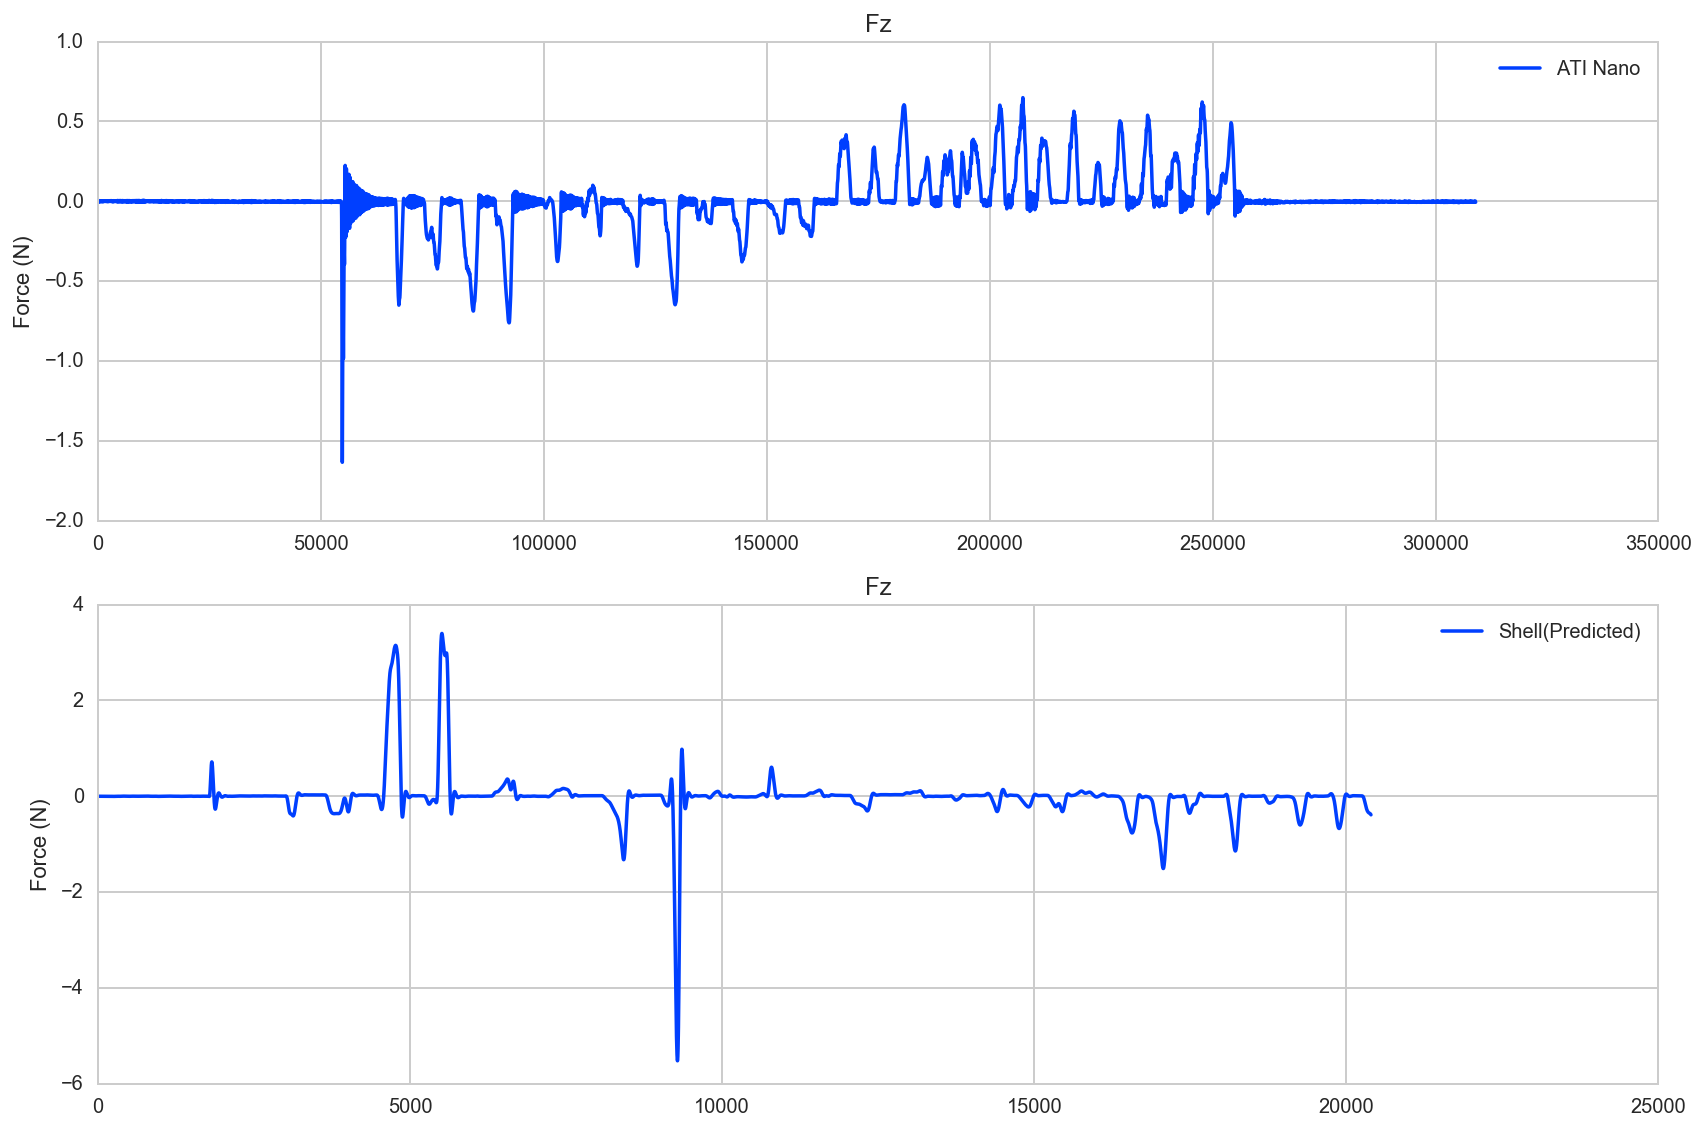

In [4]:
fig, ax = plt.subplots(2)
ax[0].plot(nano_df["Fz"], label="ATI Nano")
ax[0].set_title("Fz")
ax[0].set_ylabel("Force (N)")
ax[0].legend(loc='upper right')

ax[1].plot(utils.add_forces_moments(telem_df, C)["Fz"], label="Shell(Predicted)")
ax[1].set_ylabel("Force (N)")
ax[1].set_title("Fz")
ax[1].legend(loc='upper right')

fig.set_size_inches(12, 8)
plt.tight_layout()

plt.show()

In [15]:
FLICK_NANO_INDEX = nano_df["Fz"][:100000].apply(abs).argmax(axis=0)
FLICK_TELEM_INDEX = utils.add_forces_moments(telem_df, C)['Fz'][:3000].apply(abs).argmax(axis=0) # the flick index
print FLICK_NANO_INDEX
print FLICK_TELEM_INDEX

54814
1825


In [16]:
M, S = calibration.align_two_streams(nano_df, telem_df, 10, 1, FLICK_NANO_INDEX, FLICK_TELEM_INDEX)
print M.shape
print S.shape

(18570, 6)
(18570, 8)


In [17]:
# C = calibration.least_squares_fit(M,S)

In [18]:
S_df = pd.DataFrame(S, columns=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])
shell_sensor_df = utils.add_forces_moments(S_df, C)
nano_sensor_df = pd.DataFrame(M, columns=["Fx", "Fy", "Fz", "Mx", "My", "Mz"])

Index([u'time', u'Right Leg Pos', u'Left Leg Pos', u'Commanded Right Leg Pos',
       u'Commanded Left Leg Pos', u'DCR', u'DCL', u'GyroX', u'GyroY', u'GyroZ',
       u'AX', u'AY', u'AZ', u'RBEMF', u'LBEMF', u'VBatt', u'S1', u'S2', u'S3',
       u'S4', u'S5', u'S6', u'S7', u'S8'],
      dtype='object')


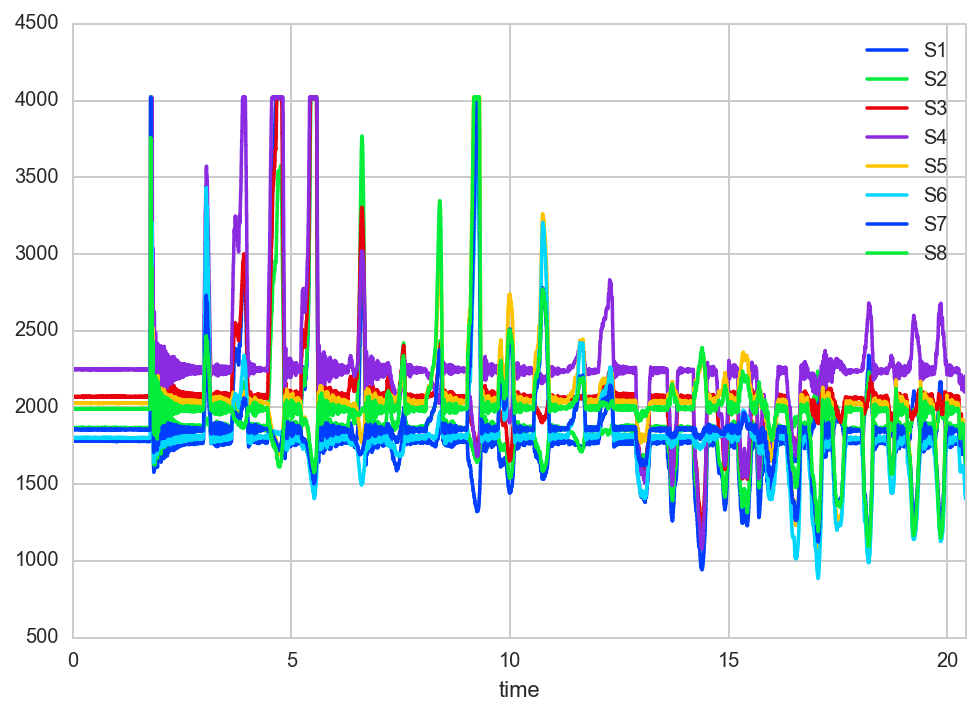

In [19]:
df = utils.process_data_files(TELEMETRY_FILE, CALIBRATION_FILE)
df.plot(x="time", y=["S1", "S2", "S3", "S4", "S5", "S6", "S7", "S8"])

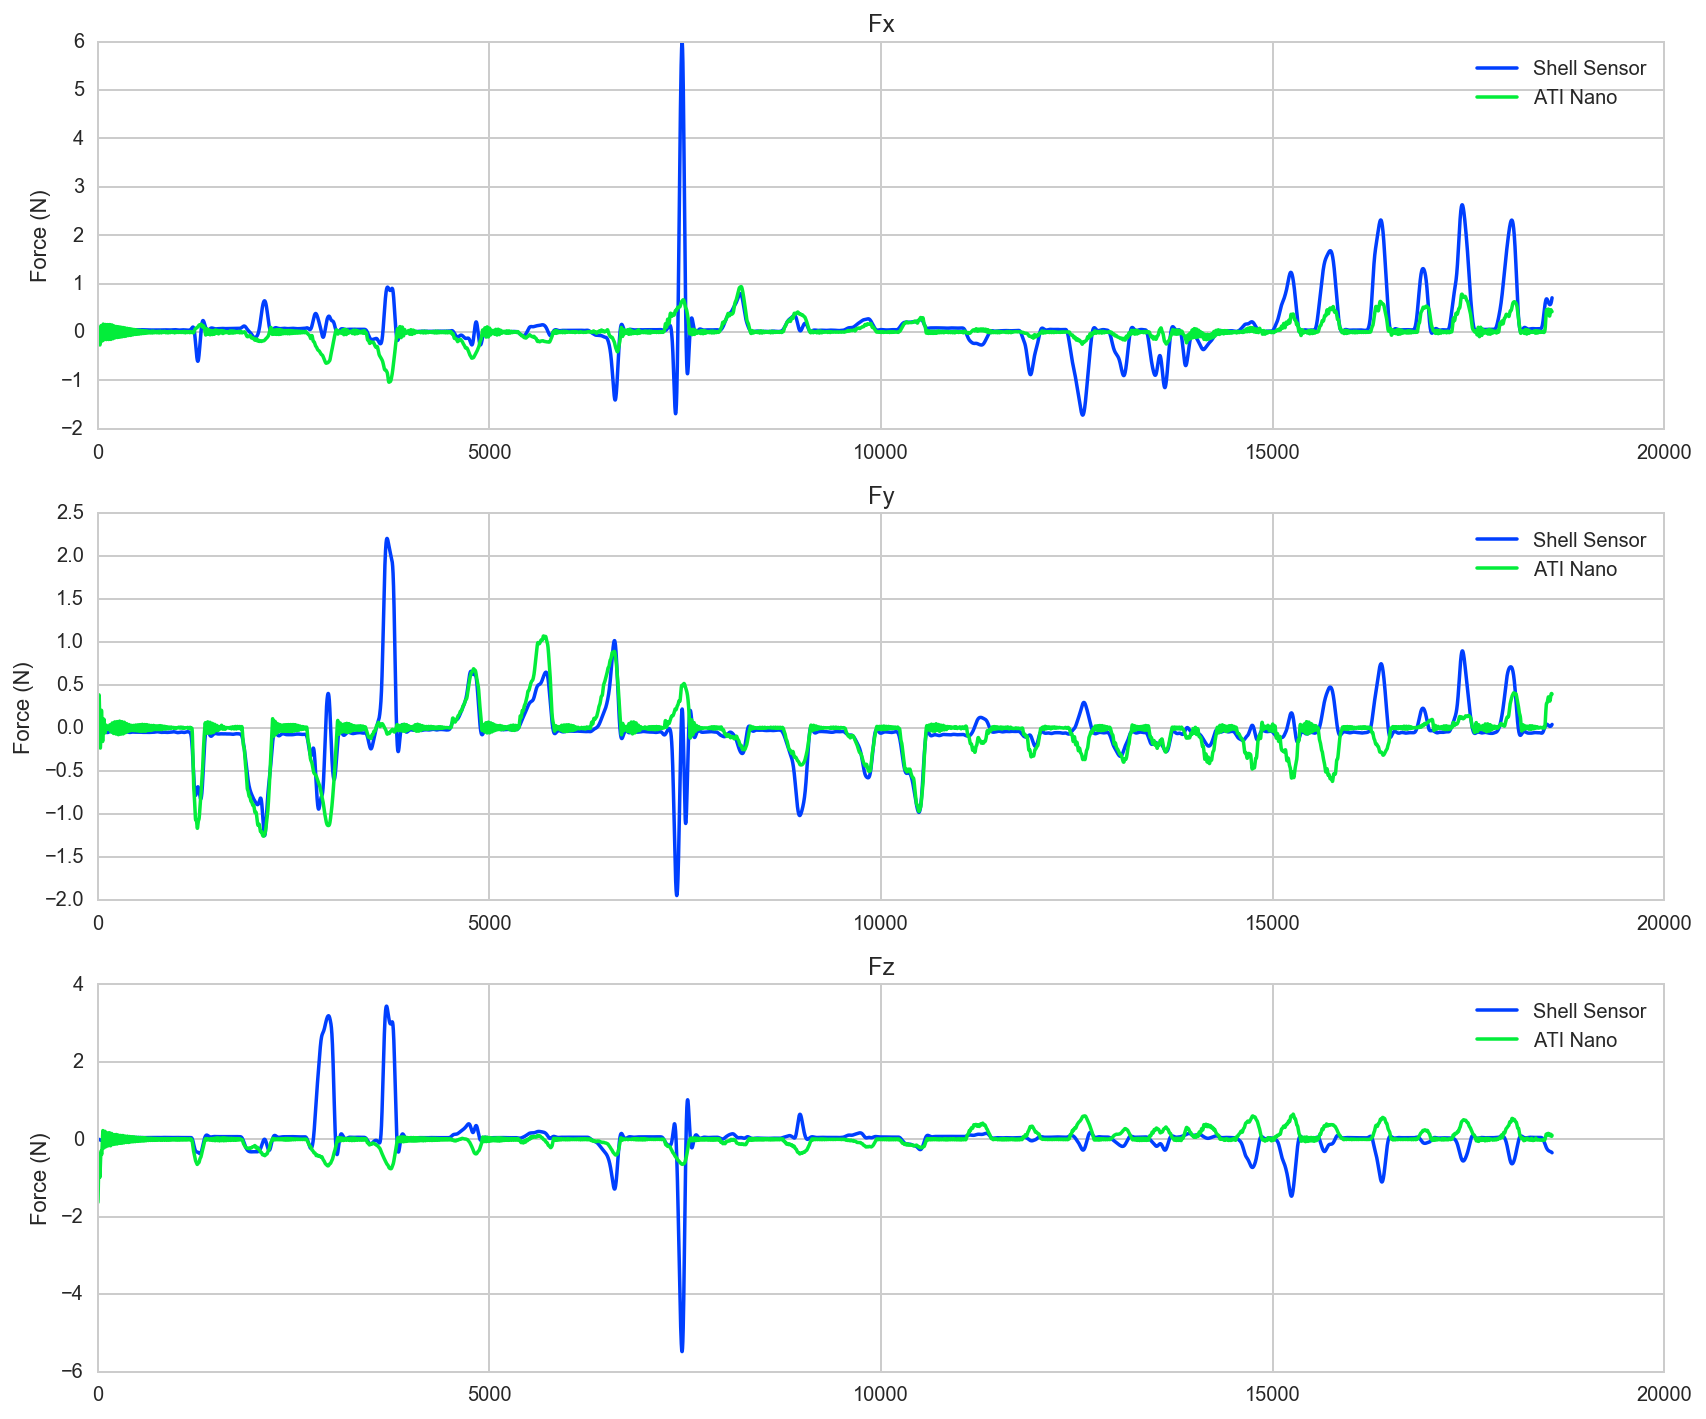

In [20]:
calibration.plot_force_error(shell_sensor_df, nano_sensor_df)

In [22]:
loss = calibration.calculate_mse_error(shell_sensor_df, nano_sensor_df, columns=['Fx', 'Fy', 'Fz'])
print loss

Fx    0.230525
Fy    0.094022
Fz    0.391318
dtype: float64
